In [145]:
import scipy.stats as stats
import matplotlib.patches as mpatches
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [153]:
ct =pd.read_csv("catalog for image resolution and size.csv")
ct.head(10)

,file,size(BYTE),size(KB),size(MB),resolution(DPI)
0,Florence/20180915a_jpgs/jpgs/C25870216.jpg,8974386,8764.048828,8.558641,96
1,Florence/20180915a_jpgs/jpgs/C25870235.jpg,8151144,7960.101563,7.773537,96
2,Florence/20180915a_jpgs/jpgs/C25870324.jpg,8165571,7974.190430,7.787295,96
3,Florence/20180915a_jpgs/jpgs/C25870782.jpg,7886169,7701.336914,7.520837,96
4,Florence/20180915a_jpgs/jpgs/C25871060.jpg,7017676,6853.199219,6.692577,96
5,Florence/20180915a_jpgs/jpgs/C25871069.jpg,6086620,5943.964844,5.804653,96
6,Florence/20180915a_jpgs/jpgs/C25871159.jpg,11921486,11642.076170,11.369215,300
7,Florence/20180915a_jpgs/jpgs/C25871166.jpg,6389661,6239.903320,6.093656,96
8,Florence/20180915a_jpgs/jpgs/C25871524.jpg,7276103,7105.569336,6.939033,96
9,Florence/20180915a_jpgs/jpgs/C25871583.jpg,11616227,11343.971680,11.078097,300


In [154]:
size_mean = ct["size(MB)"].mean()
size_median = ct["size(MB)"].median()
size_variance = ct["size(MB)"].var()
size_SD = ct["size(MB)"].std()
print("size mean: " + str(size_mean))
print("size median: " + str(size_median))
print("size variance: " + str(size_variance))
print("size SD: " + str(size_SD))

size mean: 7.29473926071142
size median: 6.865087508999999
size variance: 4.818473185178074
size SD: 2.1951020899215767


In [155]:
resolution_mean = ct["resolution(DPI)"].mean()
resolution_median = ct["resolution(DPI)"].median()
resolution_variance = ct["resolution(DPI)"].var()
resolution_SD = ct["resolution(DPI)"].std()
print("resolution mean: " + str(resolution_mean))
print("resolution median: " + str(resolution_median))
print("resolution variance: " + str(resolution_variance))
print("resolution SD: " + str(resolution_SD))

resolution mean: 145.875751503006
resolution median: 96.0
resolution variance: 7702.498587536447
resolution SD: 87.76387974295831


Text(0.5, 1.0, 'Sample size = 500')

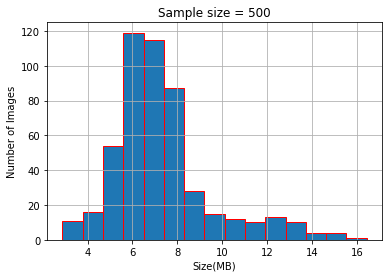

In [156]:
pd.DataFrame(ct).hist(column="size(MB)", bins=15, ec='red')
plt.xlabel("Size(MB)")
plt.ylabel( "Number of Images")
plt.title("Sample size = " + str(ct.shape[0]+1) + str())

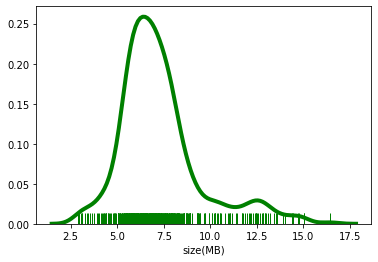

In [170]:
# seaborn histogram and density plot
sns.distplot(ct['size(MB)'], hist=False, kde=True, rug=True,
             bins=15, color = 'green', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

Text(0.5, 1.0, 'Sample size = 500')

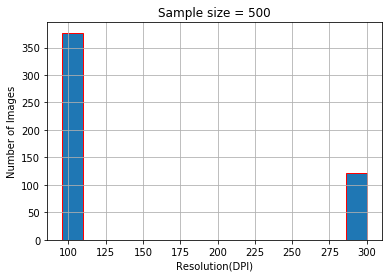

In [166]:
pd.DataFrame(ct).hist(column="resolution(DPI)", bins=15, ec='red')
plt.xlabel("Resolution(DPI)")
plt.ylabel( "Number of Images")
plt.title("Sample size = " + str(ct.shape[0]+1) + str())

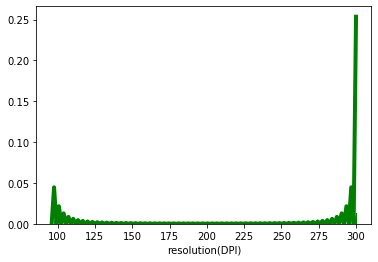

In [178]:
# seaborn histogram and density plot
sns.distplot(ct['resolution(DPI)'], hist=False, kde=True, rug=True,
             bins=15, color = 'green', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

In [190]:
sample_size = 500

for sample in range(25):
    sample = np.random.choice(a=ct["size(MB)"], size = sample_size)
    sample_mean = sample.mean()
    
    t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value
    
    sigma = size_SD/math.sqrt(sample_size)  # Standard deviation estimate
    margin_of_error = t_critical * sigma
    
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
print("T-critical value: " + str(t_critical))
print("Sample Size Mean: " + str(sample_mean))
print("Confidence interval: " + str(confidence_interval))

T-critical value: 2.0638985616280205
Sample Size Mean: 7.2970971508
Confidence interval: (7.09448846038436, 7.49970584121564)


In [192]:
sample_size = 500

for sample in range(25):
    sample = np.random.choice(a=ct["resolution(DPI)"], size = sample_size)
    sample_mean = sample.mean()
    
    t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value
    
    sigma = resolution_SD/math.sqrt(sample_size)  # Standard deviation estimate
    margin_of_error = t_critical * sigma
    
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
print("T-critical value: " + str(t_critical))
print("Sample Resolution Mean: " + str(sample_mean))
print("Confidence interval: " + str(confidence_interval))

T-critical value: 2.0638985616280205
Sample Resolution Mean: 148.632
Confidence interval: (140.53136321314707, 156.73263678685294)


In [194]:
print('Covariance of size and resolution: %.2f'%np.cov(ct["size(MB)"], ct["resolution(DPI)"])[0, 1])
print('Correlation of size and resolution: %.2f'%np.corrcoef(ct["size(MB)"], ct["resolution(DPI)"])[0, 1])

Covariance of size and resolution: 25.97
Correlation of size and resolution: 0.13


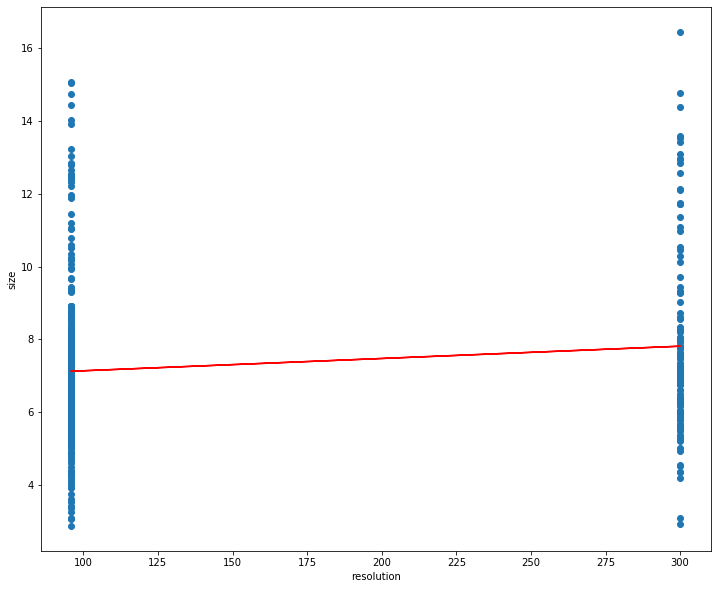

Correlation of size and resolution: 0.13


In [197]:
m, b = np.polyfit(ct["resolution(DPI)"], ct["size(MB)"], 1)

plt.figure(figsize=(12,10))
plt.scatter(ct["resolution(DPI)"], ct["size(MB)"])
plt.xlabel('resolution')
plt.ylabel('size')
plt.plot(ct["resolution(DPI)"], m*ct["resolution(DPI)"] + b, 'r-')
plt.show()
print('Correlation of size and resolution: %.2f'%np.corrcoef(ct["resolution(DPI)"], ct["size(MB)"])[0, 1])